### Import Packages and Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

### Iris 데이터 불러오기, Train/Test set 분할

In [2]:
iris = load_iris()
X = iris.data[:, :4] # 3개의 특징을 사용하고 싶은 경우 iris.data[:, :3], 4개의 특징을 모두 사용하고 싶은 경우 iris.data[:, :4] 등
y = iris.target

# 성능 측정을 위한 train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=30) # test_size: 테스트에 사용할 비율. 0 ~ 1.0 사이의 값

In [3]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(105, 4)
(105,)
(45, 4)
(45,)


### 학습 / 결과분석

In [4]:
# Gaussian NB classifier 선언
nb = GaussianNB()

# Train 데이터로 학습 진행
nb.fit(x_train, y_train)

GaussianNB()

In [5]:
# test set에 대한 예측(분류) 수행
prediction = nb.predict(x_test)

In [6]:
# test set에 대한 예측 결과
prediction

array([2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1])

In [7]:
# test set 정답 label
y_test

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1])

In [8]:
# 정확도 (accuracy)
(prediction==y_test).mean()

0.9111111111111111

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

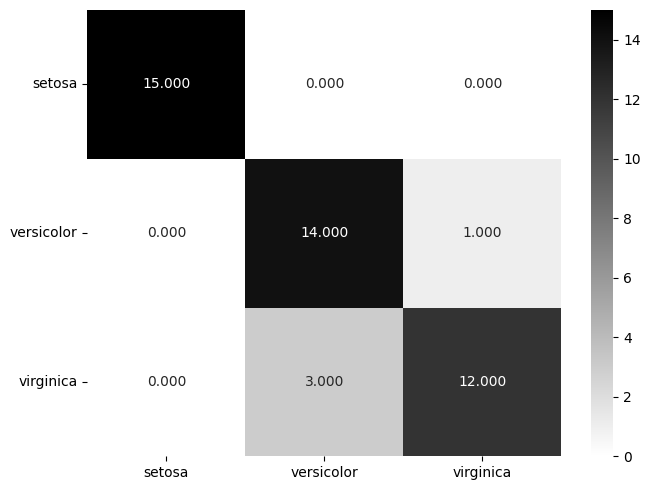

In [10]:
# confusion matrix 그리기
x_lab = iris.target_names
y_lab = iris.target_names

conf_matrix = confusion_matrix(y_test, prediction)
#conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()

In [11]:
# precision, recall, F1
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.8235    0.9333    0.8750        15
           2     0.9231    0.8000    0.8571        15

    accuracy                         0.9111        45
   macro avg     0.9155    0.9111    0.9107        45
weighted avg     0.9155    0.9111    0.9107        45



### 새로운 데이터에 대해 예측해보기

In [12]:
# iris 데이터 일부 관찰
iris = load_iris()
print(iris.data[:5])
print(iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [13]:
# 새로운 데이터에 대해 예측
nb.predict([[5.09, 3.51, 1.39, 0.195]])

array([0])

In [14]:
# 각 class label에 대한 확률 보기
nb.predict_proba([[5.09, 3.51, 1.39, 0.195]])

array([[1.00000000e+00, 1.07914175e-18, 8.37909119e-31]])